In [11]:
import pandas as pd

dataset = pd.read_csv('HR.csv')

print(dataset.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

In [12]:
from sklearn.preprocessing import LabelEncoder

sales_encoder = LabelEncoder()
salary_encoder = LabelEncoder()

dataset['sales'] = sales_encoder.fit_transform(dataset['sales'])
dataset['salary'] = salary_encoder.fit_transform(dataset['salary'])


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_dataset = dataset.copy()
normalized_dataset[normalized_dataset.drop(['salary'], axis=1).columns] = scaler.fit_transform(normalized_dataset[normalized_dataset.drop(['salary'], axis=1).columns])

print(normalized_dataset.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0            0.318681         0.265625             0.0              0.285047   
1            0.780220         0.781250             0.6              0.775701   
2            0.021978         0.812500             1.0              0.822430   
3            0.692308         0.796875             0.6              0.593458   
4            0.307692         0.250000             0.0              0.294393   

   time_spend_company  Work_accident  left  promotion_last_5years     sales  \
0               0.125            0.0   1.0                    0.0  0.777778   
1               0.500            0.0   1.0                    0.0  0.777778   
2               0.250            0.0   1.0                    0.0  0.777778   
3               0.375            0.0   1.0                    0.0  0.777778   
4               0.125            0.0   1.0                    0.0  0.777778   

   salary  
0       1  
1       2  
2       

In [14]:
cluster_dataset = normalized_dataset.copy()
cluster_dataset = cluster_dataset[['satisfaction_level', 'number_project', 'salary']]

print(cluster_dataset)

       satisfaction_level  number_project  salary
0                0.318681             0.0       1
1                0.780220             0.6       2
2                0.021978             1.0       2
3                0.692308             0.6       1
4                0.307692             0.0       1
...                   ...             ...     ...
14994            0.340659             0.0       1
14995            0.307692             0.0       1
14996            0.307692             0.0       1
14997            0.021978             0.8       1
14998            0.307692             0.0       1

[14999 rows x 3 columns]


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

kmeans = KMeans(n_clusters=4, random_state=42, max_iter=500)
kmeans.fit(cluster_dataset)

silhouette_avg = silhouette_score(cluster_dataset, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.3f}")

davies_bouldin = davies_bouldin_score(cluster_dataset, kmeans.labels_)
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")

calinski_harabasz = calinski_harabasz_score(cluster_dataset, kmeans.labels_)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.3f}")

Silhouette Score: 0.547
Davies-Bouldin Index: 0.657
Calinski-Harabasz Index: 19792.824


c:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


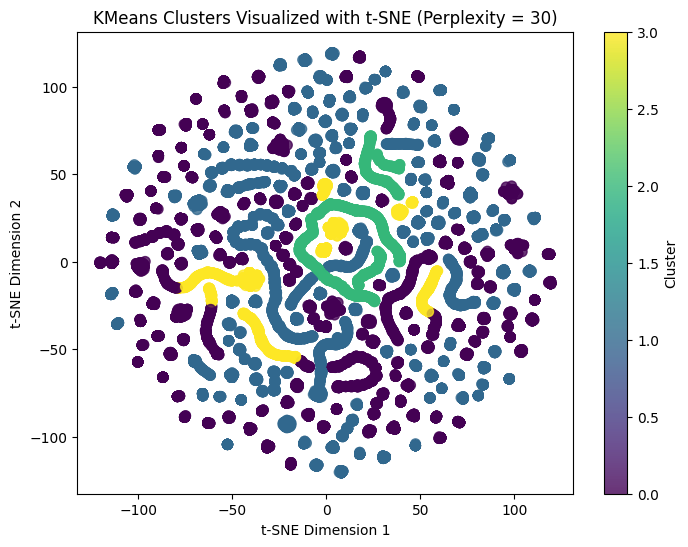

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_data = tsne.fit_transform(cluster_dataset)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(scatter, label="Cluster")
plt.title("KMeans Clusters Visualized with t-SNE (Perplexity = 30)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42, perplexity=100)
reduced_data = tsne.fit_transform(cluster_dataset)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(scatter, label="Cluster")
plt.title("KMeans Clusters Visualized with t-SNE (Perplexity = 100)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

c:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42, perplexity=250)
reduced_data = tsne.fit_transform(cluster_dataset)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(scatter, label="Cluster")
plt.title("KMeans Clusters Visualized with t-SNE (Perplexity = 250)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

In [ ]:
clustered_dataset = dataset.copy()
clustered_dataset['cluster'] = kmeans.labels_

In [ ]:
counts_per_cluster = clustered_dataset.groupby('cluster')['left'].value_counts()

counts_per_cluster_df = counts_per_cluster.reset_index(name='count')

print(counts_per_cluster_df)

   cluster  left  count
0        0     0   4588
1        0     1   1579
2        1     0   5129
3        1     1   1317
4        2     0   1155
5        2     1     82
6        3     1    593
7        3     0    556


In [ ]:
print(clustered_dataset.groupby('cluster').mean())

         satisfaction_level  last_evaluation  number_project  \
cluster                                                        
0                  0.677623         0.704818        3.486622   
1                  0.621817         0.717322        3.813528   
2                  0.637470         0.704325        3.767179   
3                  0.188172         0.782498        5.481288   

         average_montly_hours  time_spend_company  Work_accident      left  \
cluster                                                                      
0                  194.861359            3.321388       0.145289  0.256040   
1                  201.338349            3.529010       0.145361  0.204313   
2                  199.867421            3.692805       0.155214  0.066289   
3                  233.926023            4.065274       0.125326  0.516101   

         promotion_last_5years     sales  salary  
cluster                                           
0                     0.009891  5.955894    

In [ ]:
for cluster_id, cluster_data in clustered_dataset.groupby('cluster'):
    cluster_df = cluster_data.reset_index(drop=True)  # Reset index for cleaner output
    
    csv_filename = f'cluster_{cluster_id}.csv'
    cluster_df.to_csv(csv_filename, index=False)
    
    print(f"Cluster {cluster_id} saved to {csv_filename}.")


NameError: name 'excel_filename' is not defined